Set Pressure Calculator

Imports

In [71]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from pathlib import Path
import csv
import glob
import os

Givens

In [72]:
rho_OX = 1141  # kg/m^3
rho_FUEL = 786  # kg/m^3
rho_WATER = 997  # kg/m^3
A_fuel_injector = 1e-4  # m^2
A_lox_injector = 1e-4  # m^2
A_fuel_inlet = 1e-4  # m^2
A_lox_inlet = 1e-4  # m^2
P_chamber = 515 * 6895 # psi
P_ambient = 14.7 * 6895 # psi
mdot_fuel_required = 2.03  # kg/s
mdot_lox_required = 2.22  # kg/s
CdA_Venturi = 0.000032274

Data imports

In [73]:
try:
    HERE = Path(__file__).resolve().parent
except NameError:
    HERE = Path.cwd()

pt1053 = pd.read_csv(HERE / "1053_Venturi_Flow_Test_1053_Run_1.csv", header=None,skiprows=1).values
pt1059 = pd.read_csv(HERE / "1059_Venturi_Flow_Test_1059_Run_1.csv", header=None,skiprows=1).values


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jackgravestock/Library/CloudStorage/OneDrive-Personal/ERPL/1053_Venturi_Flow_Test_1053_Run_1.csv'

Manifold Pressures

Text(0.5, 1.0, '1059 Flow Test: Manifold Upstream Pressure vs Time')

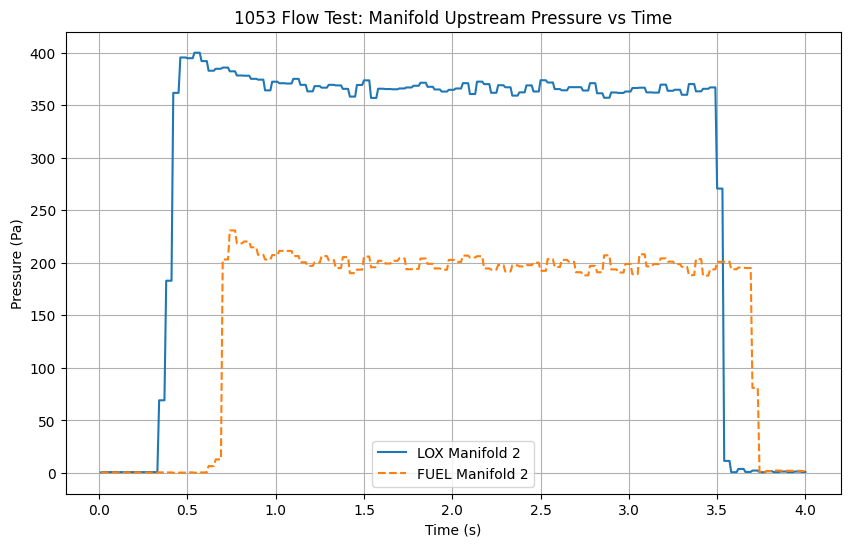

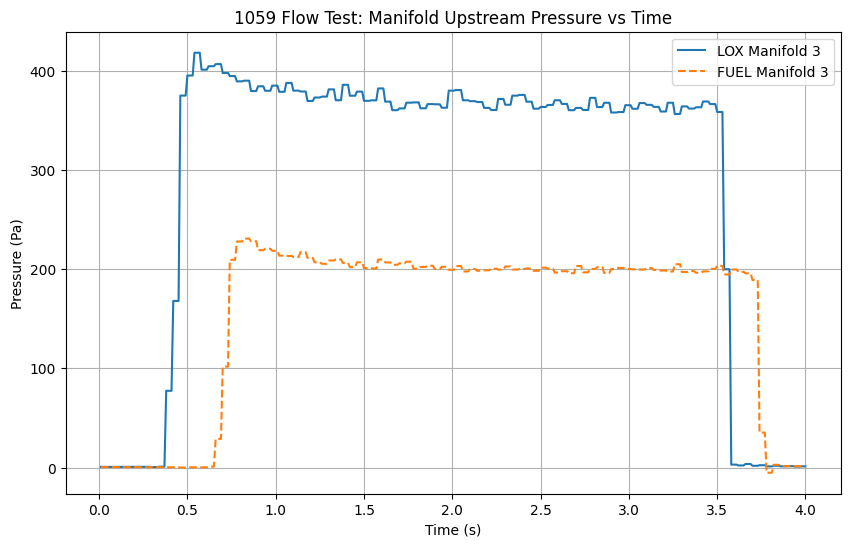

In [ ]:
x2 = pt1053[1:,1] / 1000
x3 = pt1059[1:,1] / 1000

y2 = pt1053[1:,12]
y3 = pt1059[1:,12]

y6 = pt1053[1:,17]
y7 = pt1059[1:,17]

plt.figure(figsize=(10, 6))
plt.plot(x2, y2, marker='None', label='LOX Manifold 2', linestyle='-')
plt.plot(x2, y6, marker='None', label='FUEL Manifold 2', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)
plt.title('1053 Flow Test: Manifold Upstream Pressure vs Time')

plt.figure(figsize=(10, 6))
plt.plot(x3, y3, marker='None', label='LOX Manifold 3', linestyle='-')
plt.plot(x3, y7, marker='None', label='FUEL Manifold 3', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)
plt.title('1059 Flow Test: Manifold Upstream Pressure vs Time')

In [ ]:
desired_time = 2  # seconds

mask = (x2 >= desired_time) & (x2 <= desired_time)
filtered_y2 = y2[mask]
avg_P_manifold_lox_1 = np.mean(filtered_y2)
print(f"Average LOX Manifold 2 pressure between {start_time}s and {end_time}s: {avg_P_manifold_lox_1:.2f} Psi")
filtered_y6 = y6[mask]
avg_P_manifold_fuel_1 = np.mean(filtered_y6)
print(f"Average FUEL Manifold 2 pressure between {start_time}s and {end_time}s: {avg_P_manifold_fuel_1:.2f} Psi")
filtered_y3 = y3[mask]
avg_P_manifold_lox_2 = np.mean(filtered_y3)
print(f"Average LOX Manifold 3 pressure between {start_time}s and {end_time}s: {avg_P_manifold_lox_2:.2f} Psi")
filtered_y7 = y7[mask]
avg_P_manifold_fuel_2 = np.mean(filtered_y7)
print(f"Average FUEL Manifold 3 pressure between {start_time}s and {end_time}s: {avg_P_manifold_fuel_2:.2f} Psi")

Avg_P_manifold_lox = (avg_P_manifold_lox_1 + avg_P_manifold_lox_2) / 2
Avg_P_manifold_lox_Pa = Avg_P_manifold_lox * 6895
Avg_P_manifold_fuel = (avg_P_manifold_fuel_1 + avg_P_manifold_fuel_2) / 2
Avg_P_manifold_fuel_Pa = Avg_P_manifold_fuel * 6895
print(f"Average LOX Manifold Pressure: {Avg_P_manifold_lox:.2f} Psi")
print(f"Average FUEL Manifold Pressure: {Avg_P_manifold_fuel:.2f} Psi")

Average LOX Manifold 2 pressure between 2s and 3.5s: 364.83 Psi
Average FUEL Manifold 2 pressure between 2s and 3.5s: 197.63 Psi
Average LOX Manifold 3 pressure between 2s and 3.5s: 365.67 Psi
Average FUEL Manifold 3 pressure between 2s and 3.5s: 199.50 Psi
Average LOX Manifold Pressure: 365.25 Psi
Average FUEL Manifold Pressure: 198.56 Psi


Inlet Pressures

Text(0.5, 1.0, '1059 Flow Test: Tank Downstream Pressure vs Time')

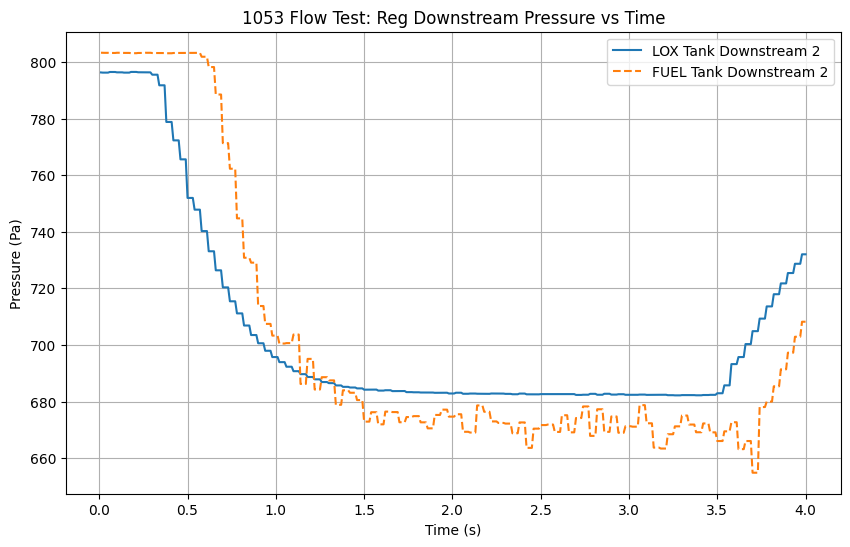

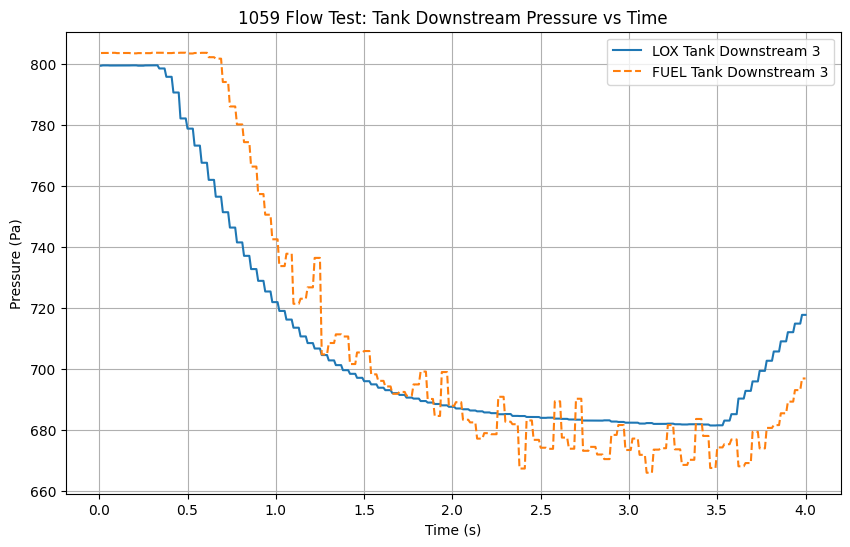

In [ ]:
x2 = pt1053[1:,1] / 1000
x3 = pt1059[1:,1] / 1000

y2 = pt1053[1:,11]
y3 = pt1059[1:,11]

y6 = pt1053[1:,16]
y7 = pt1059[1:,16]

plt.figure(figsize=(10, 6))
plt.plot(x2, y2, marker='None', label='LOX Tank Downstream 2', linestyle='-')
plt.plot(x2, y6, marker='None', label='FUEL Tank Downstream 2', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)
plt.title('1053 Flow Test: Reg Downstream Pressure vs Time')

plt.figure(figsize=(10, 6))
plt.plot(x3, y3, marker='None', label='LOX Tank Downstream 3', linestyle='-')
plt.plot(x3, y7, marker='None', label='FUEL Tank Downstream 3', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)
plt.title('1059 Flow Test: Tank Downstream Pressure vs Time')

In [ ]:
desired_time = 2.5  # seconds

mask = (x2 >= desired_time) & (x2 <= desired_time)
filtered_y2 = y2[mask]
avg_P_regdown_lox_1 = np.mean(filtered_y2)
print(f"Average LOX Manifold 2 pressure between {start_time}s and {end_time}s: {avg_P_regdown_lox_1:.2f} Psi")
filtered_y6 = y6[mask]
avg_P_regdown_fuel_1 = np.mean(filtered_y6)
print(f"Average FUEL Manifold 2 pressure between {start_time}s and {end_time}s: {avg_P_regdown_fuel_1:.2f} Psi")
filtered_y3 = y3[mask]
avg_P_regdown_lox_2 = np.mean(filtered_y3)
print(f"Average LOX Manifold 3 pressure between {start_time}s and {end_time}s: {avg_P_regdown_lox_2:.2f} Psi")
filtered_y7 = y7[mask]
avg_P_regdown_fuel_2 = np.mean(filtered_y7)
print(f"Average FUEL Manifold 3 pressure between {start_time}s and {end_time}s: {avg_P_regdown_fuel_2:.2f} Psi")

Avg_P_regdown_lox = (avg_P_regdown_lox_1 + avg_P_regdown_lox_2) / 2
Avg_P_regdown_lox_Pa = Avg_P_regdown_lox * 6895
Avg_P_regdown_fuel = (avg_P_regdown_fuel_1 + avg_P_regdown_fuel_2) / 2
Avg_P_regdown_fuel_Pa = Avg_P_regdown_fuel * 6895
print(f"Average LOX Tank Downstream Pressure: {Avg_P_regdown_lox:.2f} Psi")
print(f"Average FUEL Tank Downstream Pressure: {Avg_P_regdown_fuel:.2f} Psi")

Average LOX Manifold 2 pressure between 2.5s and 2.51s: 682.62 Psi
Average FUEL Manifold 2 pressure between 2.5s and 2.51s: 671.69 Psi
Average LOX Manifold 3 pressure between 2.5s and 2.51s: 683.98 Psi
Average FUEL Manifold 3 pressure between 2.5s and 2.51s: 674.18 Psi
Average LOX Tank Downstream Pressure: 683.30 Psi
Average FUEL Tank Downstream Pressure: 672.93 Psi


Mass Flow Actual

Average LOX Venturi Inlet Pressure 2.5s and 2.51s: 639.38 Psi
Average Fuel Venturi Inlet Pressure 2.5s and 2.51s: 627.20 Psi
Average LOX Venturi Throat Pressure 2.5s and 2.51s: -7.82 Psi
Average Fuel Venturi Throat Pressure 2.5s and 2.51s: 30.66 Psi
Average LOX Mass Flow 2.5s and 2.51s: 3.0444 kg/s
Average FUEL Mass Flow 2.5s and 2.51s: 2.9228 kg/s


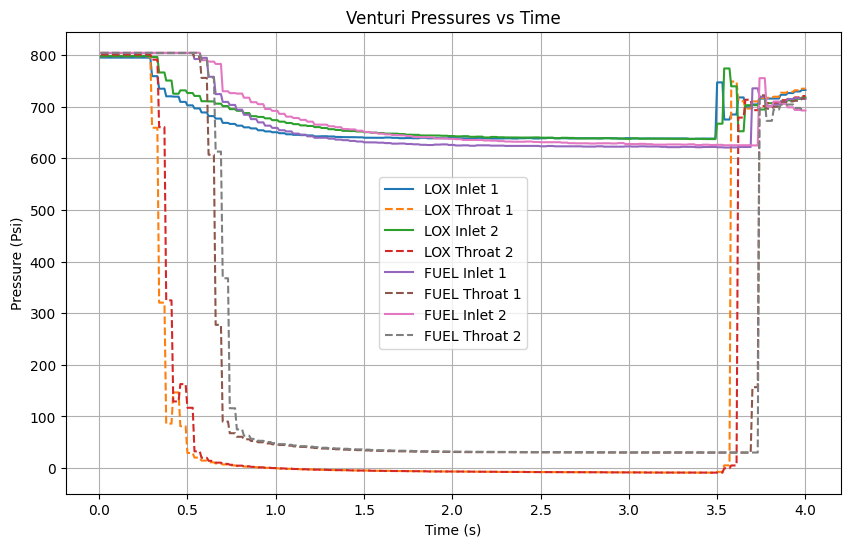

In [ ]:
Venturi_Inlet_lox_1 = pt1053[1:,2]
Venturi_Throat_lox_1 = pt1053[1:,3]
Venturi_Inlet_lox_2 = pt1059[1:,2]
Venturi_Throat_lox_2 = pt1059[1:,3]

Venturi_Inlet_fuel_1 = pt1053[1:,5]
Venturi_Throat_fuel_1 = pt1053[1:,4]
Venturi_Inlet_fuel_2 = pt1059[1:,5]
Venturi_Throat_fuel_2 = pt1059[1:,4]


filtered_Venturi_Inlet_lox_1 = Venturi_Inlet_lox_1[mask]
filtered_Venturi_Inlet_lox_2 = Venturi_Inlet_lox_2[mask]
filtered_Venturi_Inlet_fuel_1 = Venturi_Inlet_fuel_1[mask]
filtered_Venturi_Inlet_fuel_2 = Venturi_Inlet_fuel_2[mask]

filtered_Venturi_Throat_lox_1 = Venturi_Throat_lox_1[mask]
filtered_Venturi_Throat_lox_2 = Venturi_Throat_lox_2[mask]
filtered_Venturi_Throat_fuel_1 = Venturi_Throat_fuel_1[mask]
filtered_Venturi_Throat_fuel_2 = Venturi_Throat_fuel_2[mask]


avg_P_Venturi_Inlet_lox_1 = np.mean(filtered_Venturi_Inlet_lox_1)
avg_P_Venturi_Inlet_lox_2 = np.mean(filtered_Venturi_Inlet_lox_2)
avg_P_Venturi_Inlet_fuel_1 = np.mean(filtered_Venturi_Inlet_fuel_1)
avg_P_Venturi_Inlet_fuel_2 = np.mean(filtered_Venturi_Inlet_fuel_2)

avg_P_Venturi_Throat_lox_1 = np.mean(filtered_Venturi_Throat_lox_1)
avg_P_Venturi_Throat_lox_2 = np.mean(filtered_Venturi_Throat_lox_2)
avg_P_Venturi_Throat_fuel_1 = np.mean(filtered_Venturi_Throat_fuel_1)
avg_P_Venturi_Throat_fuel_2 = np.mean(filtered_Venturi_Throat_fuel_2)

plt.figure(figsize=(10, 6))
plt.plot(x2, Venturi_Inlet_lox_1, marker='None', label='LOX Inlet 1', linestyle='-')
plt.plot(x2, Venturi_Throat_lox_1, marker='None', label='LOX Throat 1', linestyle='--')
plt.plot(x2, Venturi_Inlet_lox_2, marker='None', label='LOX Inlet 2', linestyle='-')
plt.plot(x2, Venturi_Throat_lox_2, marker='None', label='LOX Throat 2', linestyle='--')
plt.plot(x2, Venturi_Inlet_fuel_1, marker='None', label='FUEL Inlet 1', linestyle='-')
plt.plot(x2, Venturi_Throat_fuel_1, marker='None', label='FUEL Throat 1', linestyle='--')
plt.plot(x2, Venturi_Inlet_fuel_2, marker='None', label='FUEL Inlet 2', linestyle='-')
plt.plot(x2, Venturi_Throat_fuel_2, marker='None', label='FUEL Throat 2', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (Psi)')
plt.legend()
plt.grid(True)
plt.title('Venturi Pressures vs Time')


Avg_P_Venturi_Inlet_lox = (avg_P_Venturi_Inlet_lox_1 + avg_P_Venturi_Inlet_lox_2) / 2
Avg_P_Venturi_Inlet_fuel = (avg_P_Venturi_Inlet_fuel_1 + avg_P_Venturi_Inlet_fuel_2) / 2

Avg_P_Venturi_Throat_lox = (avg_P_Venturi_Throat_lox_1 + avg_P_Venturi_Throat_lox_2) / 2
Avg_P_Venturi_Throat_fuel = (avg_P_Venturi_Throat_fuel_1 + avg_P_Venturi_Throat_fuel_2) / 2

print(f"Average LOX Venturi Inlet Pressure {start_time}s and {end_time}s: {Avg_P_Venturi_Inlet_lox:.2f} Psi")
print(f"Average Fuel Venturi Inlet Pressure {start_time}s and {end_time}s: {Avg_P_Venturi_Inlet_fuel:.2f} Psi")
print(f"Average LOX Venturi Throat Pressure {start_time}s and {end_time}s: {Avg_P_Venturi_Throat_lox:.2f} Psi")
print(f"Average Fuel Venturi Throat Pressure {start_time}s and {end_time}s: {Avg_P_Venturi_Throat_fuel:.2f} Psi")


mdot_lox = CdA_Venturi * (np.sqrt(2 * rho_WATER * (Avg_P_Venturi_Inlet_lox - Avg_P_Venturi_Throat_lox) * 6895))
mdot_fuel = CdA_Venturi * (np.sqrt(2 * rho_WATER * (Avg_P_Venturi_Inlet_fuel - Avg_P_Venturi_Throat_fuel) * 6895))

print(f"Average LOX Mass Flow {start_time}s and {end_time}s: {mdot_lox:.4f} kg/s")
print(f"Average FUEL Mass Flow {start_time}s and {end_time}s: {mdot_fuel:.4f} kg/s")



CdA Calculations

In [ ]:
CdA_manifold_lox = mdot_lox/ (np.sqrt(2 * rho_WATER * (Avg_P_manifold_lox_Pa - P_ambient)))
CdA_manifold_fuel = mdot_fuel / (np.sqrt(2 * rho_WATER * (Avg_P_manifold_fuel_Pa - P_ambient)))   
print(f"CdA Manifold LOX: {CdA_manifold_lox:.6f} m^2")
print(f"CdA Manifold FUEL: {CdA_manifold_fuel:.6f} m^2")  

CdA_feedlines_lox = mdot_lox / (np.sqrt(2 * rho_WATER * (Avg_P_regdown_lox_Pa - Avg_P_manifold_lox_Pa)))
CdA_feedlines_fuel = mdot_fuel / (np.sqrt(2 * rho_WATER * (Avg_P_regdown_fuel_Pa - Avg_P_manifold_fuel_Pa)))
print(f"CdA Feedlines LOX: {CdA_feedlines_lox:.6f} m^2")
print(f"CdA Feedlines FUEL: {CdA_feedlines_fuel:.6f} m^2")

CdA_System_Lox = np.sqrt(1/ ((1/CdA_manifold_lox**2) + (1/CdA_feedlines_lox**2)))
CdA_System_Fuel = np.sqrt(1/ ((1/CdA_manifold_fuel**2) + (1/CdA_feedlines_fuel**2)))

print(f"CdA System LOX: {CdA_System_Lox:.9f} m^2")
print(f"CdA System FUEL: {CdA_System_Fuel:.9f} m^2")

CdA Manifold LOX: 0.000044 m^2
CdA Manifold FUEL: 0.000058 m^2
CdA Feedlines LOX: 0.000046 m^2
CdA Feedlines FUEL: 0.000036 m^2
CdA System LOX: 0.000031753 m^2
CdA System FUEL: 0.000030724 m^2


Set Pressure Calculations

In [ ]:
Set_Pressure_LOX = ((((mdot_lox_required / CdA_System_Lox) ** 2) / (2 * rho_OX)) + P_chamber)/6895
Set_Pressure_FUEL = ((((mdot_fuel_required / CdA_System_Fuel) ** 2) / (2 * rho_FUEL)) + P_chamber)/6895
print(f"Set Pressure LOX: {Set_Pressure_LOX:.2f} Psi")
print(f"Set Pressure FUEL: {Set_Pressure_FUEL:.2f} Psi")

Set Pressure LOX: 825.66 Psi
Set Pressure FUEL: 917.76 Psi
